In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
train=pd.read_csv("../input/digit-recognizer/train.csv")
test= pd.read_csv("../input/digit-recognizer/test.csv")
sub=pd.read_csv("../input/digit-recognizer/sample_submission.csv")
print(train)
print()
print(test)
print(train.info())
print(train.describe())
print(test.info())
print(test.describe())


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X= train.drop('label', axis=1)
y=train['label']
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [5]:
X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [6]:
X=X/255.0
test=test/255.0

In [7]:
import tensorflow as tf
X=X.values.reshape(-1, 28,28,1)
test=test.values.reshape(-1, 28,28,1)
y=tf.keras.utils.to_categorical(y, num_classes=10)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=2)


print(X_train.shape)
print(X_test.shape)

(31500, 28, 28, 1)
(10500, 28, 28, 1)


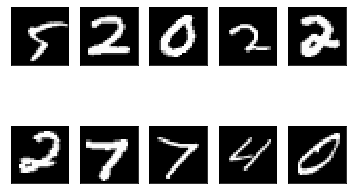

In [9]:
fig = plt.figure()
for i in range(10):
  plt.subplot(2,5,i+1)
 
  plt.imshow(X_train[i][:,:,0], cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(X_train[i][:,:,0]))
  plt.xticks([])
  plt.yticks([])

In [10]:
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,kernel_size=(5,5), activation='relu', input_shape=(28,28,1),padding="same"),
    tf.keras.layers.BatchNormalization(scale=True),
    tf.keras.layers.Conv2D(16,kernel_size=(5,5), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(scale=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(32,kernel_size=(5,5), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(scale=True),
    tf.keras.layers.Conv2D(32,kernel_size=(5,5), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(scale=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(scale=True),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(scale=True),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        6416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        1

In [11]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.3)
#optimizer_rms=RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08,centered=True)
model.compile(optimizer=optimizer_SGD, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer=optimizer_rms, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
image_gen= ImageDataGenerator(featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False,  rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, brightness_range=None, shear_range=0.1, zoom_range=0.1,
    channel_shift_range=0.1, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.1)
image_gen.fit(X_train)

In [13]:
fit_value=model.fit_generator(image_gen.flow(X_train, y_train, batch_size=150), epochs=35, validation_data=(X_test,y_test),
                             verbose=2, steps_per_epoch=X_train.shape[0]//150, 
                              callbacks=[ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                                           factor=0.5, min_lr=0.00001)])

Epoch 1/35
210/210 - 87s - loss: 1.5616 - accuracy: 0.5514 - val_loss: 0.3631 - val_accuracy: 0.8839 - lr: 0.3000
Epoch 2/35
210/210 - 86s - loss: 0.3007 - accuracy: 0.9092 - val_loss: 0.4358 - val_accuracy: 0.8666 - lr: 0.3000
Epoch 3/35
210/210 - 86s - loss: 0.1632 - accuracy: 0.9523 - val_loss: 0.0900 - val_accuracy: 0.9727 - lr: 0.3000
Epoch 4/35
210/210 - 86s - loss: 0.1313 - accuracy: 0.9621 - val_loss: 0.1135 - val_accuracy: 0.9663 - lr: 0.3000
Epoch 5/35
210/210 - 86s - loss: 0.1144 - accuracy: 0.9661 - val_loss: 0.0892 - val_accuracy: 0.9738 - lr: 0.3000
Epoch 6/35
210/210 - 87s - loss: 0.0989 - accuracy: 0.9699 - val_loss: 0.0556 - val_accuracy: 0.9825 - lr: 0.3000
Epoch 7/35
210/210 - 86s - loss: 0.0861 - accuracy: 0.9746 - val_loss: 0.0561 - val_accuracy: 0.9829 - lr: 0.3000
Epoch 8/35
210/210 - 86s - loss: 0.0839 - accuracy: 0.9753 - val_loss: 0.0607 - val_accuracy: 0.9829 - lr: 0.3000
Epoch 9/35
210/210 - 86s - loss: 0.0741 - accuracy: 0.9780 - val_loss: 0.0434 - val_accu

In [14]:
prediction = model.predict(test)
prediction = np.argmax(prediction,axis = 1)
prediction = pd.Series(prediction,name="Label")

In [15]:


output = pd.concat([pd.Series(range(1,28001),name = "ImageId"),prediction],axis = 1)
#submission.to_csv("cnn_mnist_datagen.csv",index=False)

#output = pd.DataFrame({'ImageId': test.index,
#                       'Label': prediction})
output.to_csv('submission.csv', index=False)

In [16]:
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
